### week 4

# Basis Functions

- nonlinear regression
- basis functions
- multivariate nonlinear regression

In [1]:
import pods
import notebook as nb
import mlai
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline

### Review and Preview

- Last week we explored least squares for univariate and multivariate regression
- Normal (Gaussian) distribution, likelihood, matrices, linear algebra and derivatives were also looked at
- This week we introduce *basis functions* for nonlinear regression models that are linear in parameters

### Nonlinear Regression

Linear regression may not produce a suitable model where each input, $x$, is not linearly related to the outcome, $y$.

A potential solution is to create a feature space and define $\phi(x)$ where $\phi(\cdot)$ is a nonlinear function of $x$.

Model for target is a linear combination of these nonlinear functions:
$$
  f(x) = \sum_{j=0}^m w_j \phi_j(x)
$$

Wikipedia: [Nonlinear regression](https://en.wikipedia.org/wiki/Nonlinear_regression)

### Polynomial Basis

Basis functions can be **global**.

(eg) quadratic (ie, squared) basis is a linear combination of the basis functions $1$, $x$ and $x^2$ :
$$
  \phi_j(x) = (1, x, x^2)
$$

In [2]:
nb.display_plots('polynomial_basis{num_basis:0>3}.svg', directory='./diagrams', num_basis=(1,3))

### Function using Polynomial Basis

Functions may be derived from quadratic basis:
$$
  f(x) = w_0 + w_1 x + w_2 x^2
$$

(next graph) example for $f(x)$ (thick line) with randomly generated $(w_0, w_1, w_2)$ and a set of basis functions (thin lines)

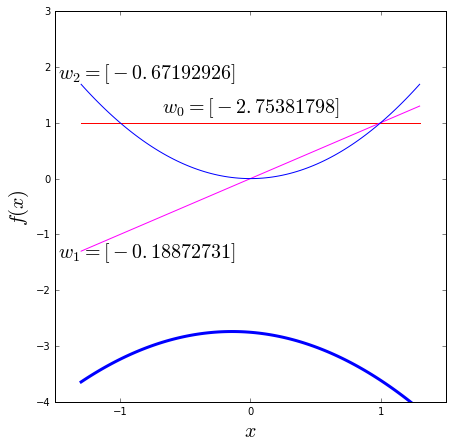

In [3]:
f, ax = plt.subplots(figsize=(7, 7))
loc =[[0, 1.2], [-0.8, -1.4], [-0.8, 1.8]]
text =['$\phi(x) = 1$', '$\phi(x) = x$', '$\phi(x) = x^2$']
mlai.plot_basis(mlai.polynomial, x_min=-1.3, x_max=1.3, fig=f, ax=ax, loc=loc, text=text)

In [4]:
nb.display_plots('polynomial_function{func_num:0>3}.svg', directory='./diagrams', func_num=(1,3))

### Radial Basis

Basis functions can be **local**.

(eg) radial (or Gaussian) basis : $\phi_j(x) = \exp\left( -\frac{(x - \mu_j)^2}{\ell^2} \right)$


In [5]:
nb.display_plots('radial_basis{num_basis:0>3}.svg', directory='./diagrams', num_basis=(1,3))

### Function using Radial Basis

Functions may be derived from radial basis:
$$
  f(x) = w_0 e^{-2(x+1)^2}  + w_1 e^{-2x^2} + w_2 e^{-2(x-1)^2}
$$

(next graph) example for $f(x)$ (thick line) with randomly generated $(w_0, w_1, w_2)$ and a set of basis functions (thin lines)

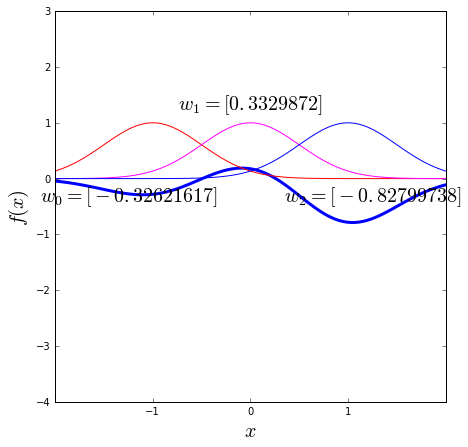

In [6]:
f, ax = plt.subplots(figsize=(7, 7))
loc = [[-1.25, -0.4], [0., 1.25], [1.25, -0.4]]
text = ['$\phi_1(x) = e^{-(x + 1)^2}$', '$\phi_2(x) = e^{-2x^2}$', '$\phi_3(x) = e^{-2(x-1)^2}$']
mlai.plot_basis(mlai.radial, x_min=-2, x_max=2, fig=f, ax=ax, loc=loc, text=text)

In [7]:
nb.display_plots('radial_function{func_num:0>3}.svg', directory='./diagrams', func_num=(1,3))

### Basis Function Models

The prediction function is now defined as
$$
  f(x_i) = \sum_{j=0}^m w_j \phi_j(x_i)
$$
which is in vector notation:
$$
  f(x_i) = \mathbf{w}^\top \boldsymbol{\phi}_i
$$

where $ \mathbf{w} = \left(\begin{array}{c} w_0 \\ \vdots \\ w_m \end{array}\right)$ and $\boldsymbol{\phi}_i = \left(\begin{array}{c} \phi_0(x_i) \\ \vdots \\ \phi_m(x_i) \end{array}\right)$ .

Wikipedia: [Basis function](https://en.wikipedia.org/wiki/Basis_function)

### Multivariate Nonlinear Regression using Basis Function

Likelihood of a single **data point**:
$$
  p(y_i | x_i) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y_i - \mathbf{w}^\top \boldsymbol{\phi}_i)^2}{2\sigma^2} \right)
$$

Log likelihood for a **data set**:
\begin{align*}
  \mathcal{L}(\mathbf{w},\sigma^2) = & \log\prod_{i=1}^n p(y_i | x_i) \\
  = & - \frac{n}{2}\log 2\pi - \frac{n}{2}\log\sigma^2 - \sum_{i=1}^n \frac{(y_i - \mathbf{w}^\top \boldsymbol{\phi}_i)^2}{2\sigma^2}
\end{align*}

### Error Function with Basis Function

\begin{align*}
  & E(\mathbf{w},\sigma^2) \\
  & = \frac{n}{2}\log\sigma^2 + \sum_{i=1}^n \frac{(y_i - \mathbf{w}^\top \boldsymbol{\phi}_i)^2}{2\sigma^2} \\
  & = \frac{n}{2}\log\sigma^2 + \frac{1}{2\sigma^2} \sum_{i=1}^n y_i^2 - \frac{1}{\sigma^2} \sum_{i=1}^n y_i \mathbf{w}^\top \boldsymbol{\phi}_i + \frac{1}{2\sigma^2} \sum_{i=1}^n \mathbf{w}^\top \boldsymbol{\phi}_i \boldsymbol{\phi}_i^\top \mathbf{w} \\
  & = \frac{n}{2}\log\sigma^2 + \frac{1}{2\sigma^2} \sum_{i=1}^n y_i^2 - \frac{1}{\sigma^2} \mathbf{w}^\top \sum_{i=1}^n \boldsymbol{\phi}_i y_i + \frac{1}{2\sigma^2} \mathbf{w}^\top \left(\sum_{i=1}^n \boldsymbol{\phi}_i \boldsymbol{\phi}_i^\top \right)\mathbf{w}
\end{align*}

### Coordinate Descent with Basis Function

Differentiate with respect to the vector $\mathbf{w}$,

$$
  \frac{\partial E(\mathbf{w},\sigma^2)}{\partial \mathbf{w}} = \frac{1}{\sigma^2} \sum_{i=1}^n \boldsymbol{\phi}_i y_i - \frac{1}{\sigma^2} \left(\sum_{i=1}^n \boldsymbol{\phi}_i \boldsymbol{\phi}_i^\top\right) \mathbf{w}
$$
then set $\frac{\partial E(\mathbf{w},\sigma^2)}{\partial \mathbf{w}} = 0$ and get
$$
  \mathbf{w}^* = \left(\sum_{i=1}^n \boldsymbol{\phi}_i \boldsymbol{\phi}_i^\top\right)^{-1} \sum_{i=1}^n \boldsymbol{\phi}_i y_i
$$

### Matrix Notation for Multiple Data Points

First recall that for a single data point:
- weights and basis functions are both column vectors with $m$ elements:
$$
  \mathbf{w} = \left(\begin{array}{c} w_0 \\ \vdots \\ w_m \end{array}\right) \qquad
  \boldsymbol{\phi}_i = \left(\begin{array}{c} \phi_0(x_i) \\ \vdots \\ \phi_m(x_i) \end{array}\right)
$$

### Matrix Notation for Multiple Data Points

For a set of $n$ data points, $(x_1,y_1), \ldots, (x_n,y_n)$ :
- outcomes are presented in a vector
- basis functions with multiple inputs are given by an $n\times m$ matrix:
$$
  \mathbf{y} = \left(\begin{array}{c} y_1 \\ \vdots \\ y_n \end{array}\right) \qquad
  \boldsymbol{\Phi} = \left(\begin{array}{c}
    \boldsymbol{\phi}_1^\top \\
    \vdots \\
    \boldsymbol{\phi}_n^\top
  \end{array}\right) = \left(\begin{array}{ccc}
    \phi_0(x_1) & \dots & \phi_m(x_1) \\
    \vdots      &       & \vdots \\
    \phi_0(x_n) & \dots & \phi_m(x_n)
  \end{array}\right)
$$

### Update Equations with Basis Function

Rewrite in matrix notation:
\begin{align*}
  \sum_{i=1}^n \boldsymbol{\phi}_i \boldsymbol{\phi}_i^\top \buildrel\triangle\over = & \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \\
  \sum_{i=1}^n \boldsymbol{\phi}_i y_i \buildrel\triangle\over = & \boldsymbol{\Phi}^\top \mathbf{y}
\end{align*}

Find updates for $\mathbf{w}$ and $\sigma^2$ :
\begin{align*}
  \mathbf{w}^* = & (\boldsymbol{\Phi}^\top \boldsymbol{\Phi})^{-1} \boldsymbol{\Phi}^\top \mathbf{y} \\
  (\sigma^2)^* = & \frac{1}{n} \sum_{i=1}^n (y_i - (\mathbf{w}^*)^\top \boldsymbol{\phi}_i)^2
\end{align*}

### Solving for $\mathbf{w}$ ...

We may want to avoid direct inverse calculation.

(eg) Rewrite
$$
  (\boldsymbol{\Phi}^\top \boldsymbol{\Phi})\mathbf{w} = \boldsymbol{\Phi}^\top \mathbf{y}
$$
then use `np.linalg.solve` .

We may also consider use of **QR decomposition** - see lab class notes.

Wikipedia: [QR decomposition](https://en.wikipedia.org/wiki/QR_decomposition)